# skill

In [1]:
import xarray as xr
import xskillscore as xs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xr.__version__

'0.14.0'

In [3]:
ds = xr.tutorial.open_dataset('rasm').load()['Tair']

In [4]:
# split dataset into two
a = ds.sel(time='1981')
b = ds.sel(time='1982')
# set time dim equal
b['time']=a.time.values

## deterministic metrics

In [5]:
deterministic_metrics = xs.core.deterministic.__all__
deterministic_metrics

['pearson_r',
 'pearson_r_p_value',
 'rmse',
 'mse',
 'mae',
 'mad',
 'smape',
 'mape',
 'spearman_r',
 'spearman_r_p_value']

### skipna

In [6]:
# set values of one timestep to nan in a
a[0,5:25,150:200]=np.nan

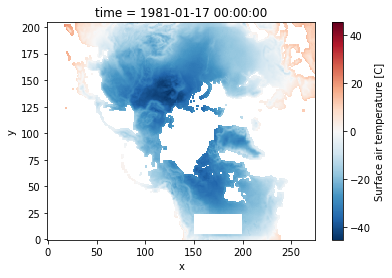

In [7]:
a.isel(time=0).plot()

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:84: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:85: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:99: RuntimeWarning: invalid value encountered in true_divide


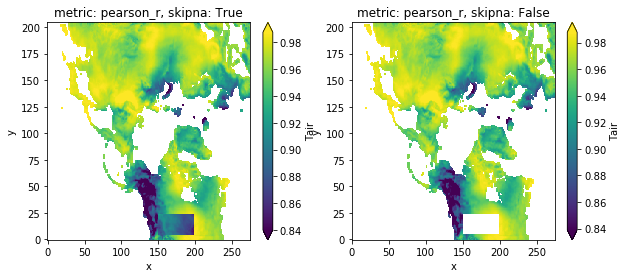

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:84: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:85: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:99: RuntimeWarning: invalid value encountered in true_divide
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:138: RuntimeWarning: invalid value encountered in less
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:138: RuntimeWarning: invalid value encountered in less


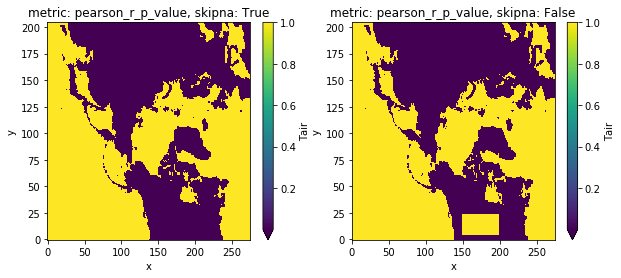

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:254: RuntimeWarning: Mean of empty slice


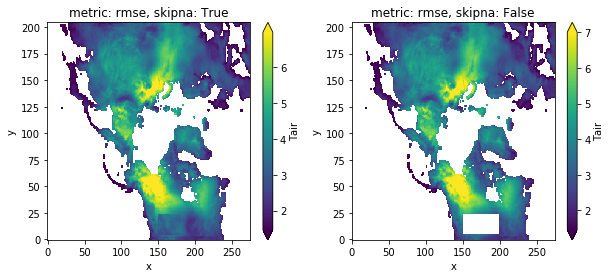

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:295: RuntimeWarning: Mean of empty slice


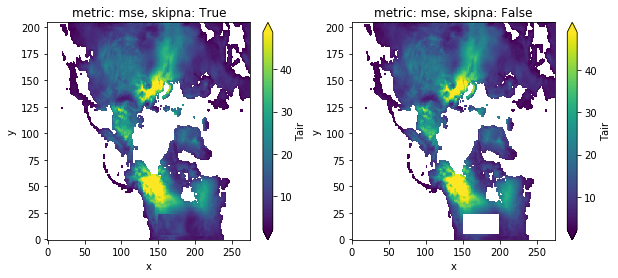

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:334: RuntimeWarning: Mean of empty slice


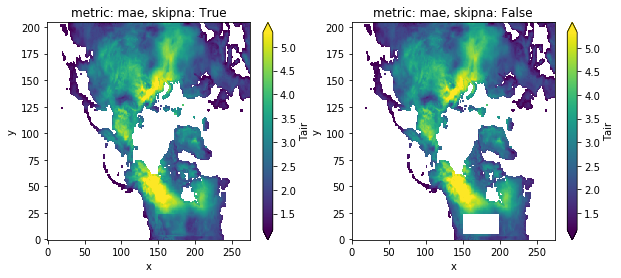

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 31379 results
  r = func(a, **kwargs)


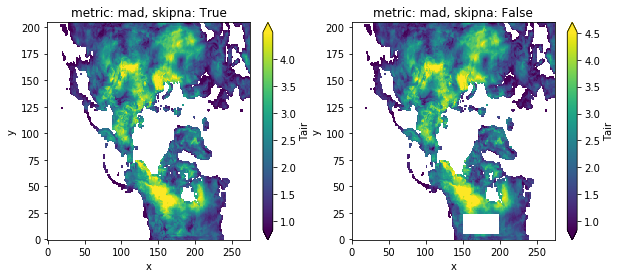

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:445: RuntimeWarning: Mean of empty slice


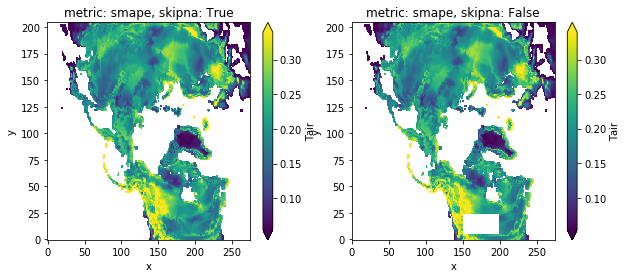

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:405: RuntimeWarning: Mean of empty slice


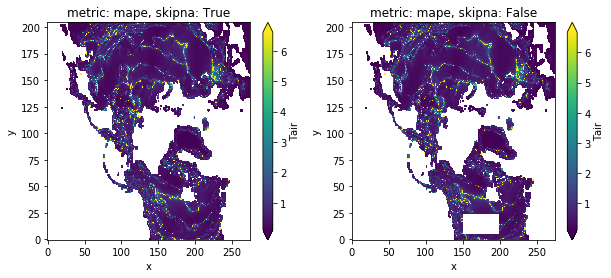

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:84: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:85: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:99: RuntimeWarning: invalid value encountered in true_divide


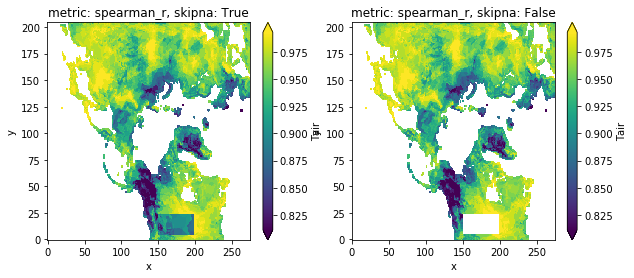

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:84: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:85: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:99: RuntimeWarning: invalid value encountered in true_divide
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:213: RuntimeWarning: divide by zero encountered in true_divide
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/scipy/st

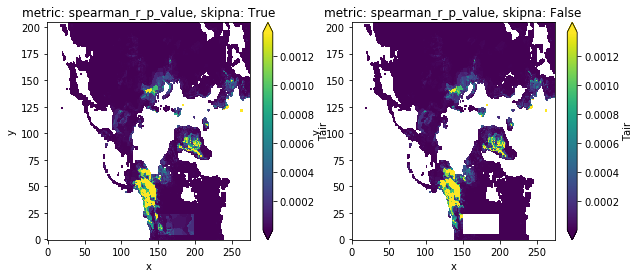

In [8]:
dim='time'
for metric in deterministic_metrics:
    fig,ax=plt.subplots(ncols=2,figsize=(10,4))
    for i,skipna in enumerate([True, False]):
        axes = ax[i]
        getattr(xs,metric)(a,b,dim=dim,skipna=skipna).plot(ax=axes,robust=True)
        axes.set_title(f'metric: {metric}, skipna: {skipna}')
    plt.show()

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:138: RuntimeWarning: invalid value encountered in less


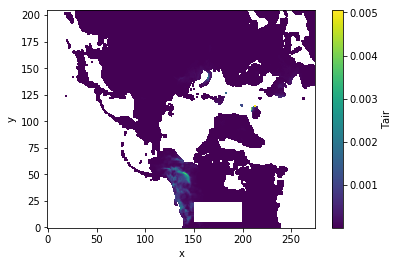

/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:84: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:85: RuntimeWarning: Mean of empty slice
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:99: RuntimeWarning: invalid value encountered in true_divide
/Users/aaron.spring/anaconda3/envs/xr/lib/python3.7/site-packages/xskillscore-0.0.7-py3.7.egg/xskillscore/core/np_deterministic.py:138: RuntimeWarning: invalid value encountered in less


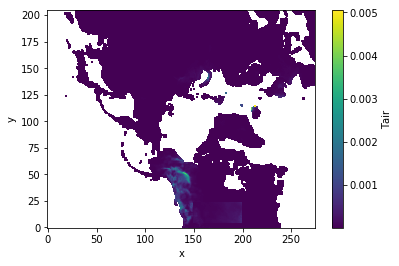

In [14]:
# pearson_r_p_value returns 1 over masked areas
# masking these masked areas shows the results over land
rp=xs.pearson_r_p_value(a,b,dim)
rp.where(rp!=1).plot()
plt.show()
rp=xs.pearson_r_p_value(a,b,dim,skipna=True)
rp.where(rp!=1).plot()

### weights

In [10]:
# weighting later months in the year stronger
weights = xr.DataArray(np.arange(6,6+a.time.size),dims='time')

In [11]:
weights

<xarray.DataArray (time: 12)>
array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
Dimensions without coordinates: time

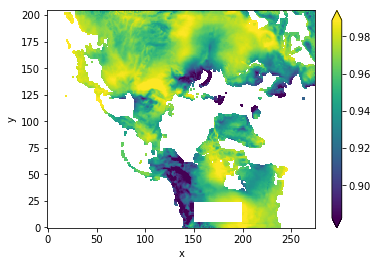

In [12]:
xs.pearson_r(a,b,weights=weights,dim=dim).plot(robust=True)

## along other axis

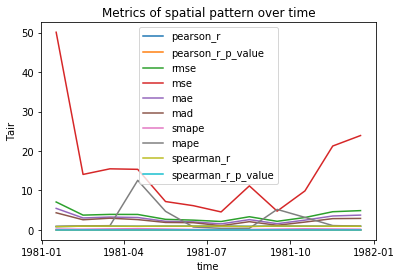

In [15]:
# along spatial dims measures metric of pattern over time
for metric in deterministic_metrics:
    # skipna needed when masked areas
    getattr(xs,metric)(a,b,dim=['x','y'],skipna=True).plot(label=metric)
plt.legend()
plt.title('Metrics of spatial pattern over time')
plt.show()

## probabilistic

In [16]:
probabilistic_metrics = xs.core.probabilistic.__all__
probabilistic_metrics

['brier_score',
 'crps_ensemble',
 'crps_gaussian',
 'crps_quadrature',
 'threshold_brier_score']

In [17]:
# what would be a good demo here? we need forecast with extra dimension member and observations